In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
dataset = pd.read_csv("datasets/Country-data.csv")
country_data_df = pd.DataFrame(dataset)

In [3]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data_df['income'] = country_data_df['income'].apply(lambda x: float(x))
country_data_df['gdpp'] = country_data_df['gdpp'].apply(lambda x: float(x))

In [6]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [7]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


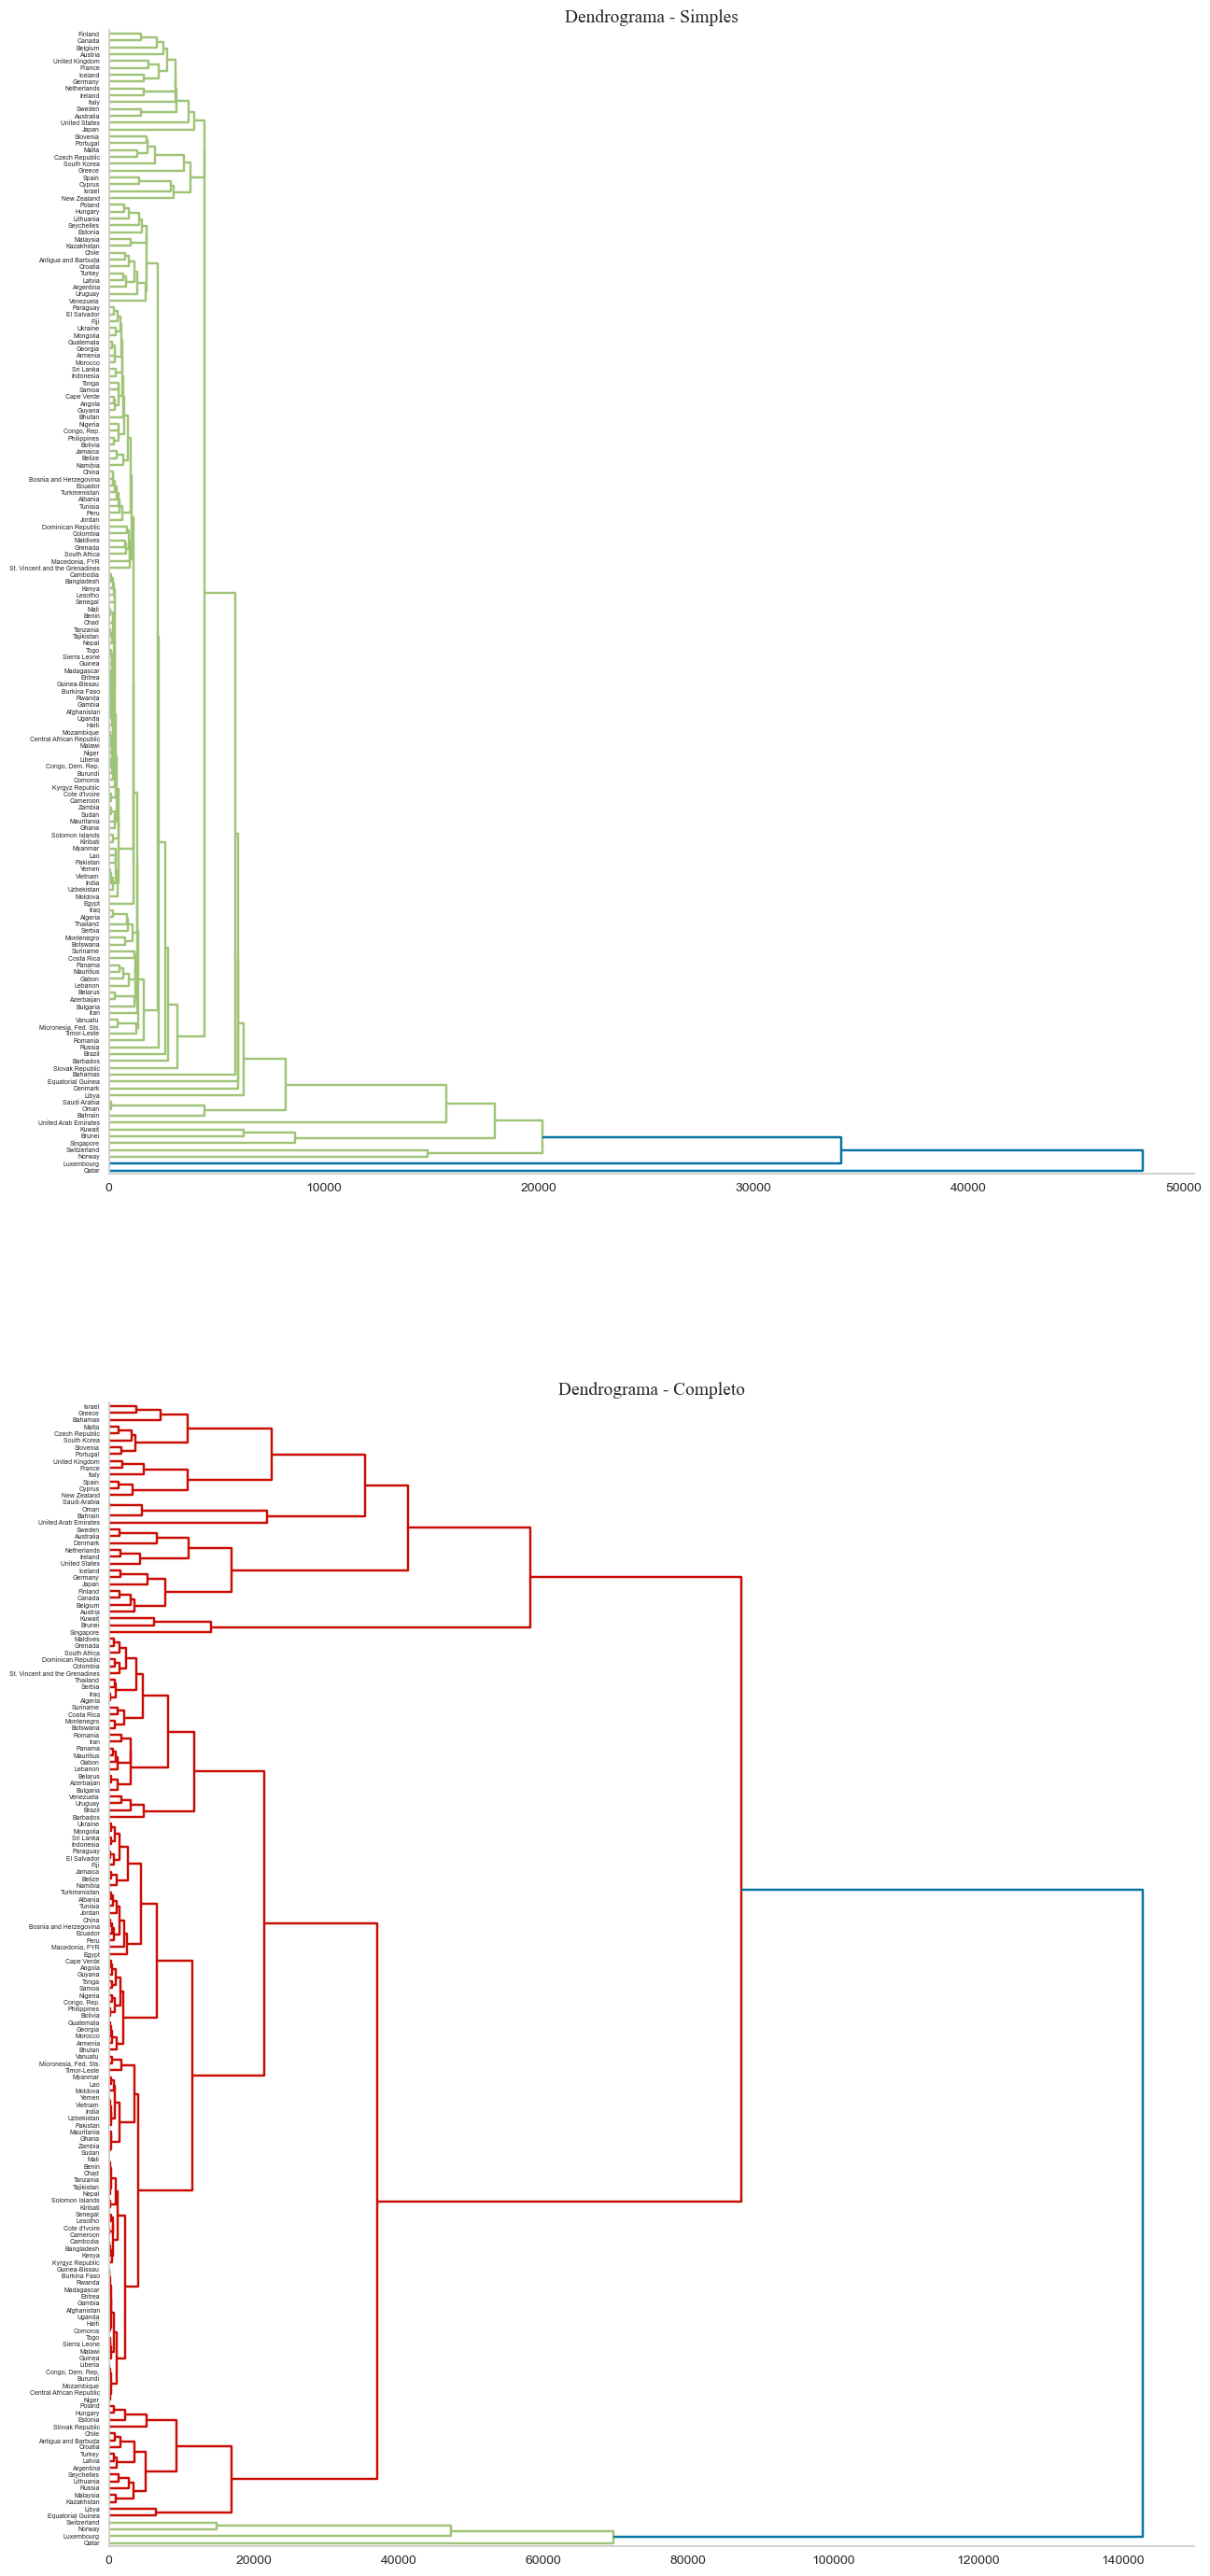

In [8]:
f, ax = plt.subplots(2, 1)
f.set_figheight(35)
f.set_figwidth(15)

single_link = hierarchy.linkage(
    country_data_df.iloc[:,1:],
    metric='euclidean',
    method='single'
)

complete_link = hierarchy.linkage(
    country_data_df.iloc[:,1:],
    metric='euclidean',
    method='complete'
)

hierarchy.dendrogram(
    single_link,
    labels=country_data_df['country'].values,
    ax=ax[0],
    orientation='right'
)

hierarchy.dendrogram(
    complete_link,
    labels=country_data_df['country'].values,
    ax=ax[1],
    orientation='right'
)

ax[0].set_title('Dendrograma - Simples', fontfamily='Times New Roman', fontsize=14)
ax[0].grid(False)
ax[1].set_title('Dendrograma - Completo', fontfamily='Times New Roman', fontsize=14)
ax[1].grid(False)

sb.despine()

In [9]:
X, labels = make_blobs(n_samples=167, n_features=2, centers=7, random_state=0)
X_scaled = StandardScaler().fit_transform(X)

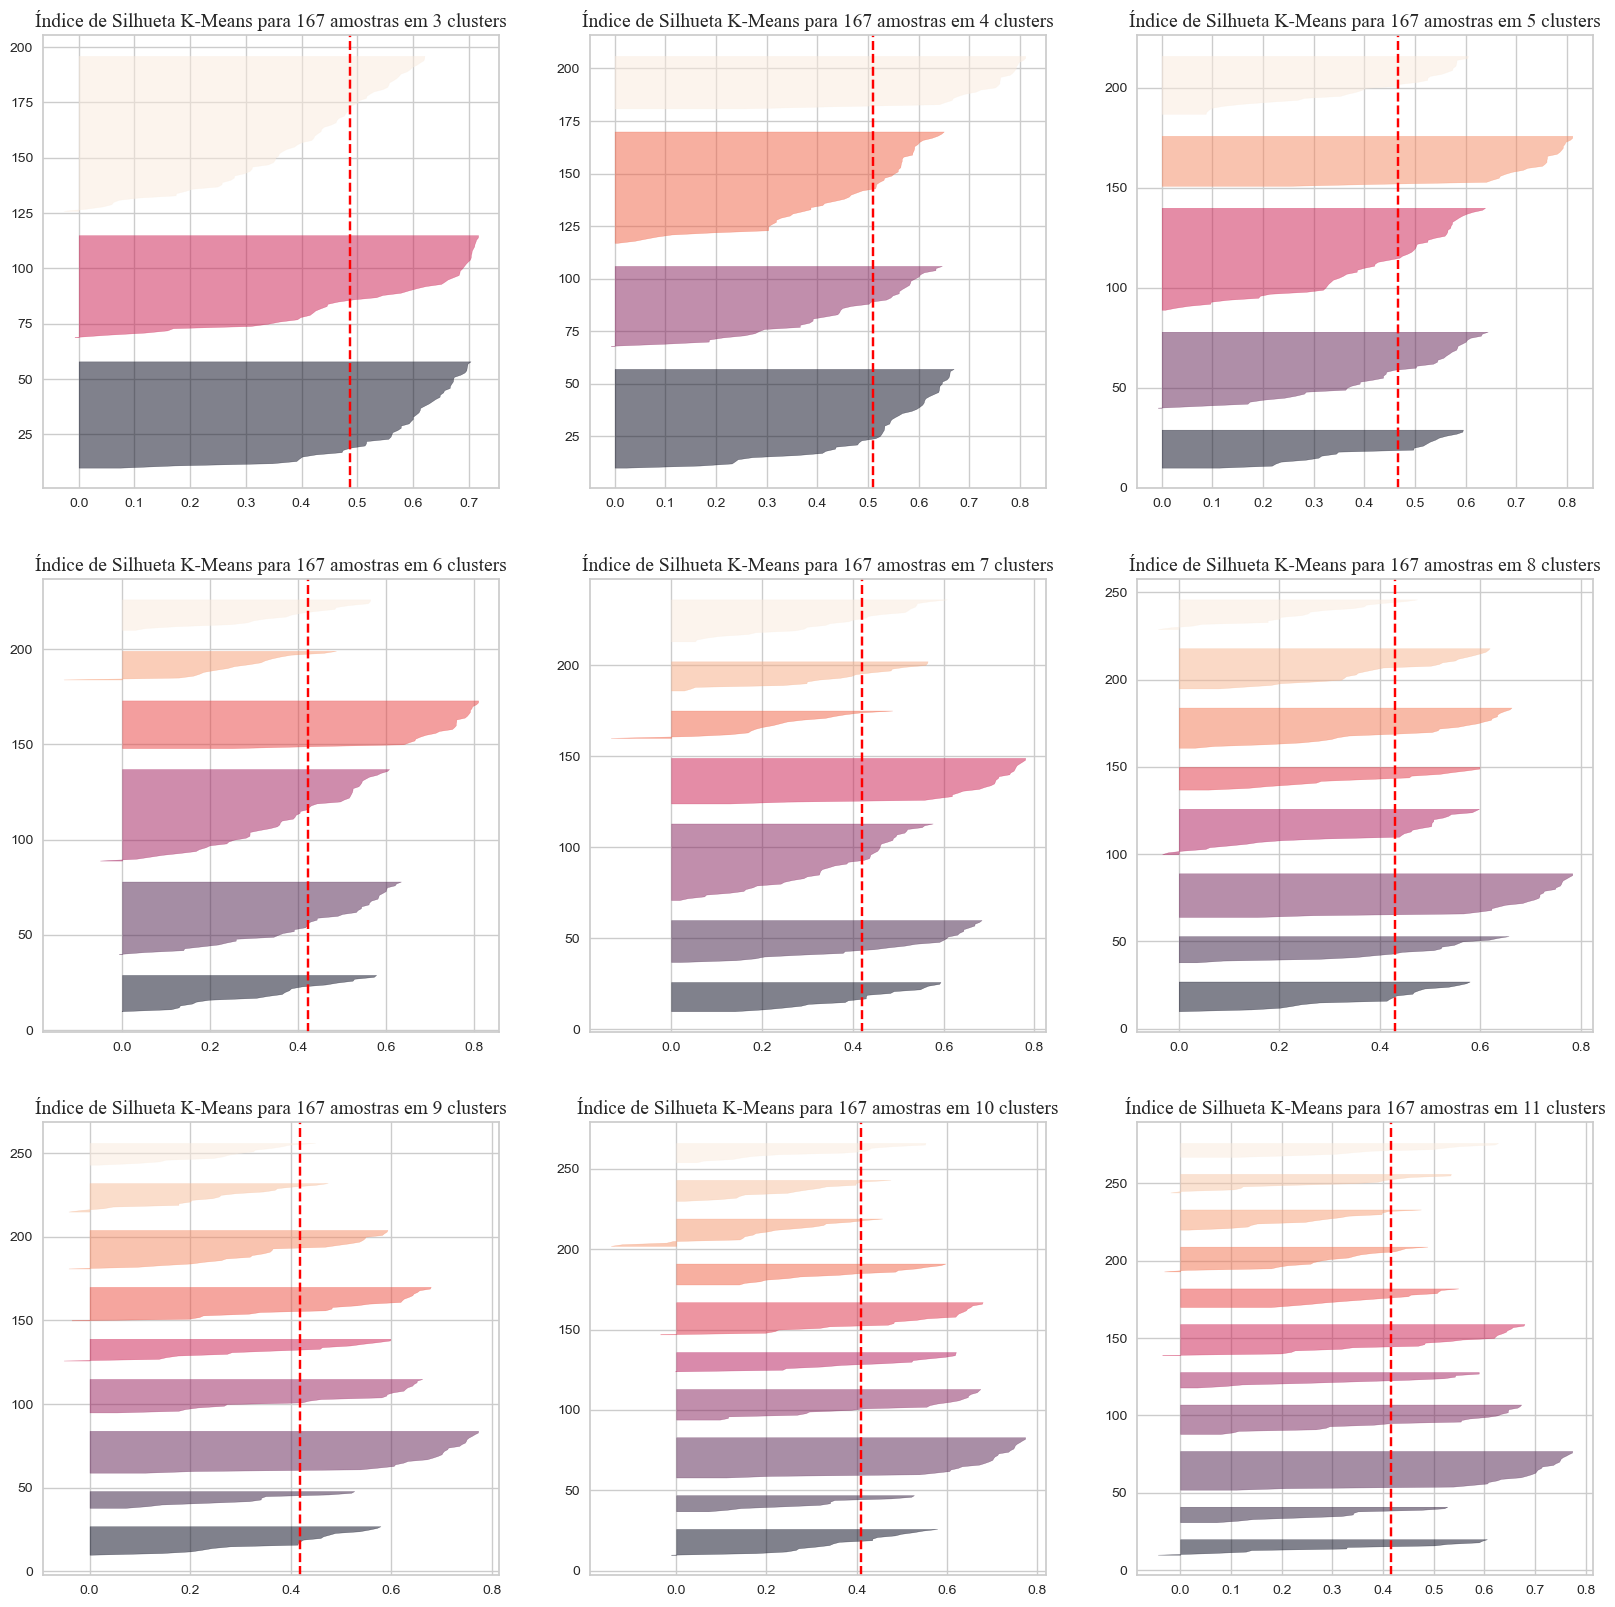

In [10]:
f, ax = plt.subplots(3, 3)
f.set_figheight(20)
f.set_figwidth(20)

for i in range(3,12):
    kmeans = KMeans(n_clusters=i, random_state=0)
    q, mod = divmod(i, 3)
    sv = SilhouetteVisualizer(
        kmeans,
        colors='rocket',
        is_fitted='auto',
        ax=ax[q-4][mod-3]
    )
    ax[q-4][mod-3].set_title(f'Índice de Silhueta K-Means para {len(X)} amostras em {i} clusters', fontfamily='Times New Roman', fontsize=14)
    sv.fit(X)

In [11]:
kmeans_country_data = KMeans(n_clusters=7).fit(X_scaled)
kmeans_country_data

,n_clusters,7
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


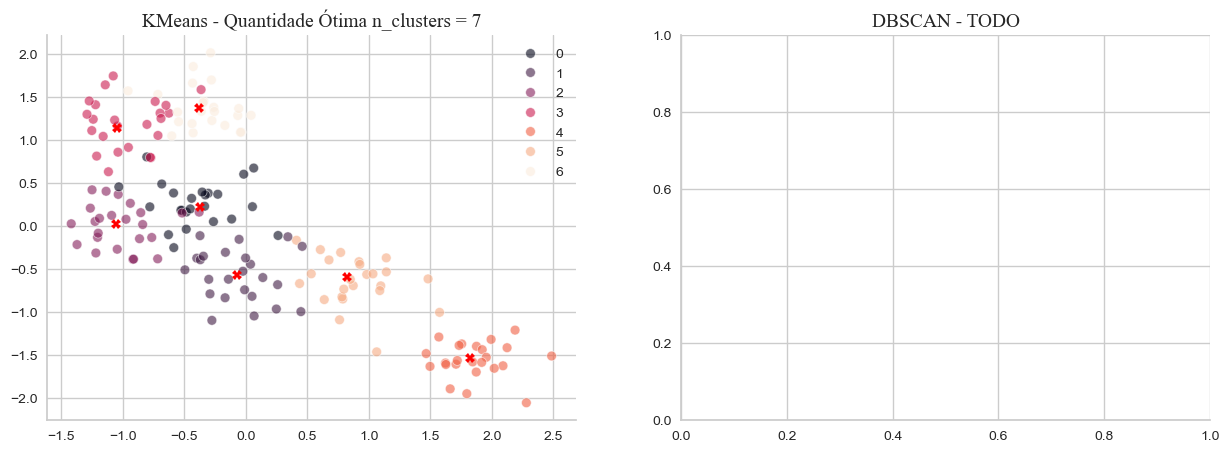

In [12]:
f, ax = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(15)

sb.scatterplot(
    x=X_scaled[:,0],
    y=X_scaled[:,1],
    hue=labels,
    palette='rocket',
    ax=ax[0],
    alpha=0.6
)

ax[0].plot(
    [x for x, _ in kmeans_country_data.cluster_centers_],
    [y for _, y in kmeans_country_data.cluster_centers_],
    'X',
    color='red'
)

ax[0].set_title('KMeans - Quantidade Ótima n_clusters = 7', fontfamily='Times New Roman', fontsize=14)
ax[1].set_title('DBSCAN - TODO', fontfamily='Times New Roman', fontsize=14)

sb.despine()